In [2]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [11]:
!pip install yfinance==0.2.4
import yfinance as yf
import pandas as pd
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 87.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.4 MB/s eta 0:00:00
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
print(html_data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [8]:
soup = BeautifulSoup(html_data, 'html5lib')
gme_revenue = pd.DataFrame(columns=["GME Quarterly Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    quarterly = col[1].text
    
    
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"GME Quarterly Revenue":quarterly}, ignore_index=True)  
gme_revenue.tail()

,GME Quarterly Revenue
11,"$8,806"
12,"$7,094"
13,"$5,319"
14,"$3,092"
15,"$1,843"


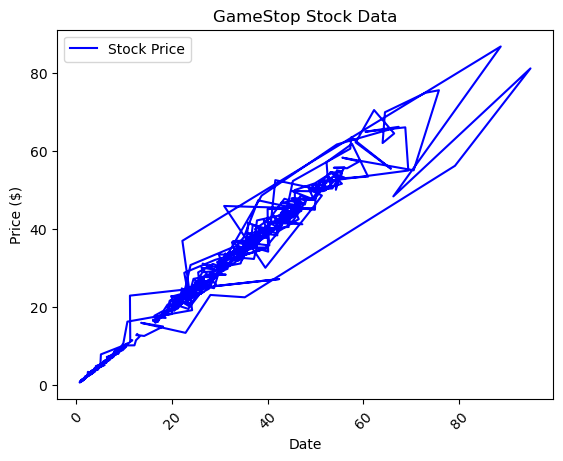

In [17]:
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    dates = stock_data['Open']
    stock_prices = stock_data['Close']
    fig, ax = plt.subplots()
    ax.plot(dates, stock_prices, 'b-', label='Stock Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.set_title(title)
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()
make_graph(gme_data, 'GameStop Stock Data')

In [13]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [15]:
gme_data['Open']

Date
2002-02-13 00:00:00-05:00     1.620128
2002-02-14 00:00:00-05:00     1.712707
2002-02-15 00:00:00-05:00     1.683250
2002-02-19 00:00:00-05:00     1.666418
2002-02-20 00:00:00-05:00     1.615920
                               ...    
2023-07-03 00:00:00-04:00    24.290001
2023-07-05 00:00:00-04:00    24.639999
2023-07-06 00:00:00-04:00    23.520000
2023-07-07 00:00:00-04:00    22.969999
2023-07-10 00:00:00-04:00    22.610001
Name: Open, Length: 5387, dtype: float64

In [ ]:
!pip install yfinance==0.2.4
import yfinance as yf
import pandas as pd
gme = yf.Ticker("TSL")
gme_data = gme.history(period="max")
gme_data.head()